# 🛍️ Customer Spending Prediction with Linear Regression

This notebook analyzes customer data from a fictional e-commerce company using exploratory data analysis (EDA) and a linear regression model.  
**Goal:** Understand what factors influence how much customers spend annually.

We’ll answer:
- What features are most correlated with customer spending?
- Should the company invest more in improving their **website** or **mobile app**?

In [31]:
#Manipulation & visualization of the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#styling
sns.set(style="whitegrid")
%matplotlib inline

In [32]:
df = pd.read_csv('Ecommerce Customers')
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [33]:
#overview
df.info()
print('\n')
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB




Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Text(0.5, 1.02, 'Pairwise Feature Relationships')

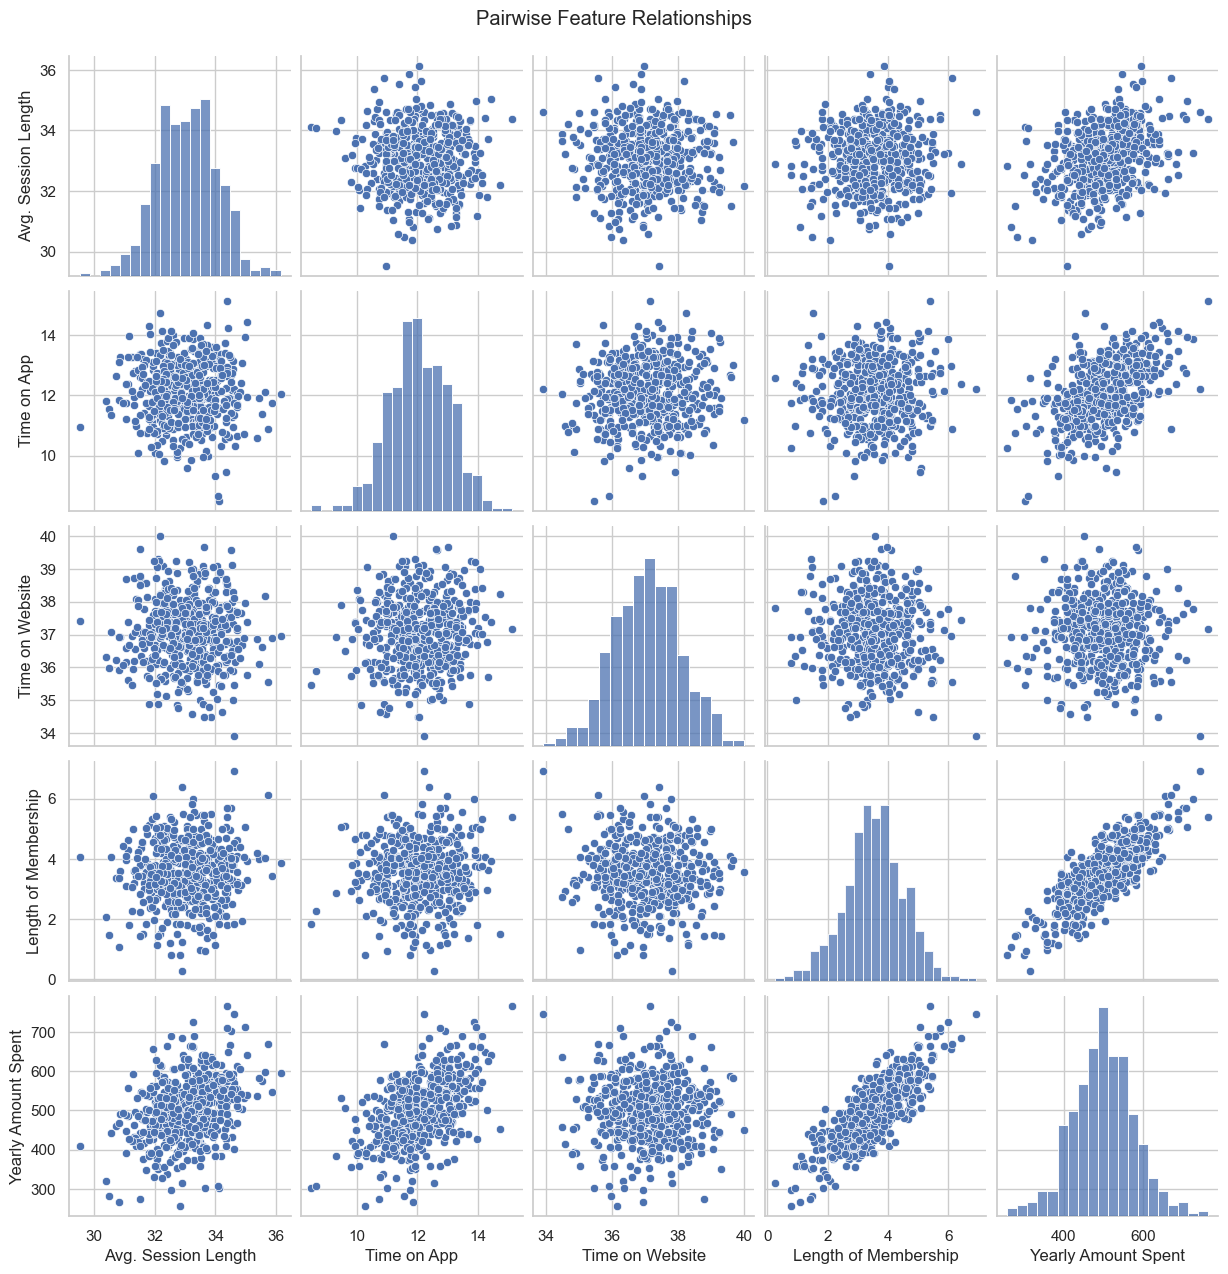

In [34]:
#plot to show their relationships
sns.pairplot(df)
plt.suptitle("Pairwise Feature Relationships", y=1.02)

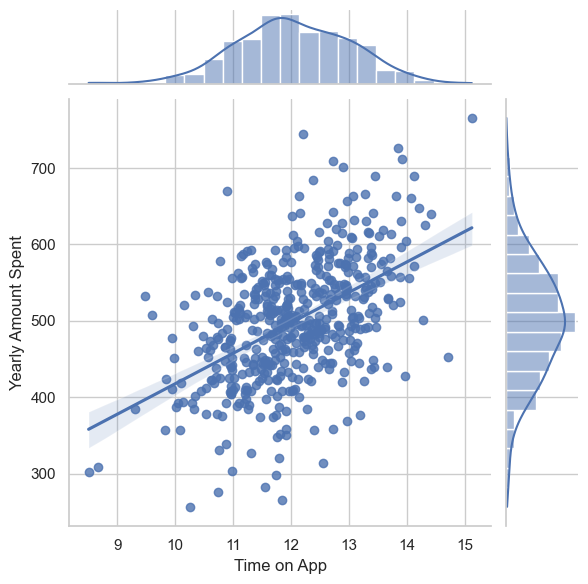

In [35]:
# Jointplot for Time on App vs Yearly Amount Spent
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent', kind='reg', height=6)

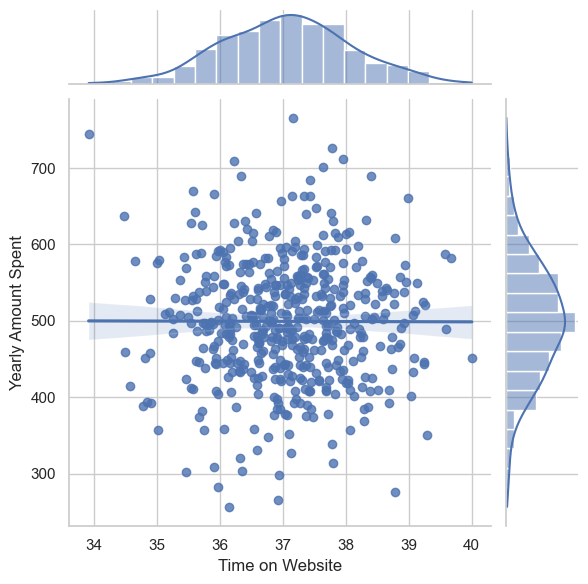

In [36]:
#Jointplot for time on web vs yearly amount spent
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent', kind='reg', height=6)

<Axes: >

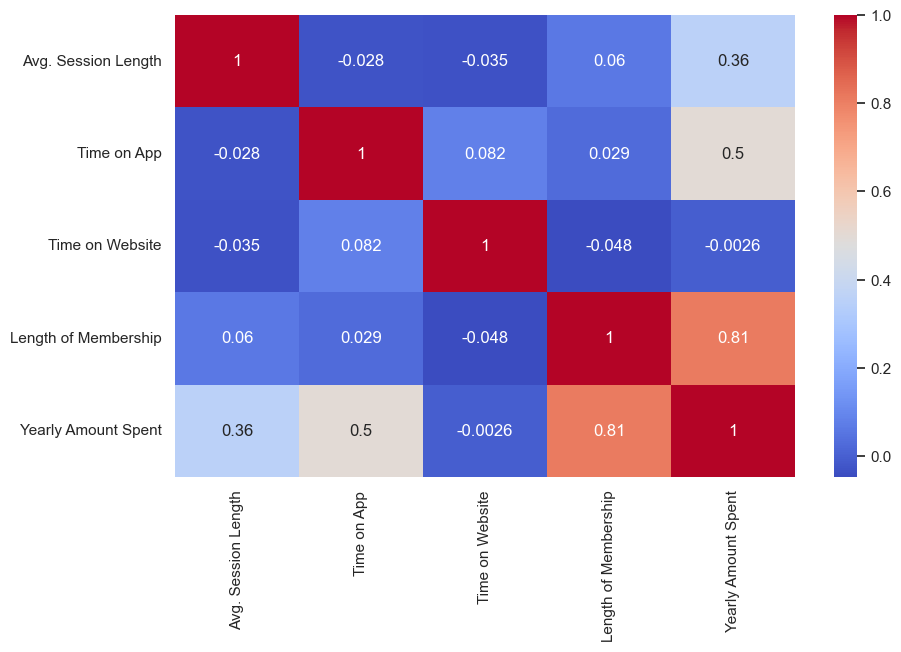

In [37]:
#heatmap of their correlations
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap = 'coolwarm')

In [38]:
#features and target
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
#model fitting
lm = LinearRegression()
lm.fit(X_train, y_train)

#model coefficients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Text(0.5, 1.0, 'Actual vs Predicted Spending')

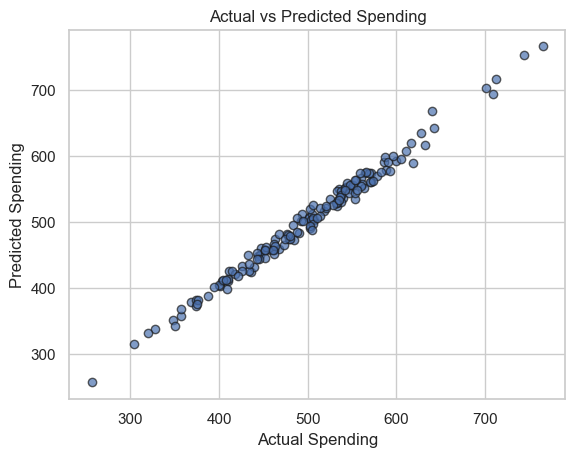

In [40]:
#model prediction and comparison

predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, edgecolor='k', alpha=0.7)
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.title('Actual vs Predicted Spending')


In [41]:
# y_test: true values
# predictions: predicted values from your model

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

#evaluation table
metrics = {
    "Metric": [
        "Mean Absolute Error (MAE)", 
        "Mean Squared Error (MSE)", 
        "Root Mean Squared Error (RMSE)", 
        "R-squared (R² Score)"
    ],
    "Value": [mae, mse, rmse, r2]
}

import pandas as pd
eval_df = pd.DataFrame(metrics)
eval_df


,Metric,Value
0,Mean Absolute Error (MAE),7.228149
1,Mean Squared Error (MSE),79.813052
2,Root Mean Squared Error (RMSE),8.933815
3,R-squared (R² Score),0.989005


Insights from the Model

Length of Membership has the strongest positive impact on yearly spending.
Time on App is also a strong predictor.
Time on Website has a very minimal effect.

This suggests two strategic options:
1. Improve the website to make it more engaging like the app.
2. Double down on enhancing the app, since it’s already driving spending.
